In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load train set

In [3]:
train_set = pd.read_csv('../train_cap2018.csv')
(nrow_default, ncol_default) = train_set.shape
features_list_default = train_set.columns.values[1:ncol_default-1]
features_list_default

array(['sentences', 'words', 'letters.all', 'syllables', 'punct',
       'avg.sentc.length', 'avg.word.length', 'avg.syll.word',
       'sntc.per.word', 'TTR', 'ARI', 'Bormuth', 'Coleman.C1',
       'Coleman.C2', 'Coleman.C3', 'Coleman.C4', 'Coleman.Liau',
       'Dale.Chall', 'Danielson.Bryan.DB1', 'Danielson.Bryan.DB2',
       'Dickes.Steiwer', 'DRP', 'ELF', 'Farr.Jenkins.Paterson', 'Flesch',
       'Flesch.Kincaid', 'FOG', 'FORCAST', 'Fucks', 'Linsear.Write',
       'LIX', 'nWS1', 'nWS2', 'nWS3', 'nWS4', 'RIX', 'SMOG', 'Spache',
       'Strain', 'Traenkle.Bailer.TB1', 'Traenkle.Bailer.TB2', 'TRI',
       'Tuldava', 'Wheeler.Smith', 'text', 'CTTR', 'HD-D (vocd-D)',
       "Herdan's C", 'Maas a', 'Maas lgV0', 'MATTR', 'MSTTR', 'MTLD',
       'Root TTR', 'Summer', 'TTR.1', 'Uber index', "Yule's K"],
      dtype=object)

## Drop string values

In [4]:
df = train_set
df = df.drop('fulltext', axis = 1)

In [5]:
def prepare_data(df):
    df = df.drop('fulltext', axis = 1)
    df = df.drop('MATTR', axis=1)
    df = df.drop('MSTTR', axis=1)
    return df

def split_df_to_data_target(df):
    # Get list of features w/o feature containing string values
    (nrow, ncol) = df.shape
    features = df.columns.values[0:ncol-1]

    # Separating out the features
    x = df.loc[:, features].values

    # Separating out the target
    y = df.loc[:,['level1']].values
    return x,y

def standard_scale_x_data(x):
    return StandardScaler().fit_transform(x)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27310 entries, 0 to 27309
Data columns (total 59 columns):
sentences                27310 non-null int64
words                    27310 non-null int64
letters.all              27310 non-null int64
syllables                27310 non-null int64
punct                    27310 non-null int64
avg.sentc.length         27310 non-null float64
avg.word.length          27310 non-null float64
avg.syll.word            27310 non-null float64
sntc.per.word            27310 non-null float64
TTR                      27310 non-null float64
ARI                      27310 non-null float64
Bormuth                  27310 non-null float64
Coleman.C1               27310 non-null int64
Coleman.C2               27310 non-null int64
Coleman.C3               27310 non-null int64
Coleman.C4               27310 non-null int64
Coleman.Liau             27310 non-null int64
Dale.Chall               27310 non-null float64
Danielson.Bryan.DB1      27310 non-null float64

In [6]:
(nrow, ncol) = df.shape
ncol

59

In [11]:
# Get max values for each columns
max_values_series = df.describe().loc['max'].sort_values(axis=0, ascending=False)
# max_values_series

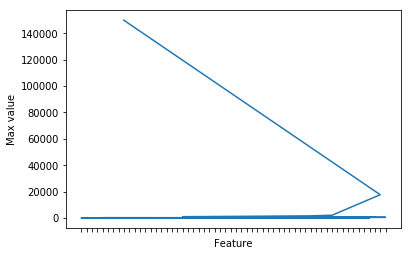

In [12]:
fig,ax = plt.subplots(1)
ax.get_xaxis().set_ticklabels([])
ax.set_ylabel('Max value')
ax.set_xlabel('Feature')
ax.plot(max_values_series)

## Plot correlation

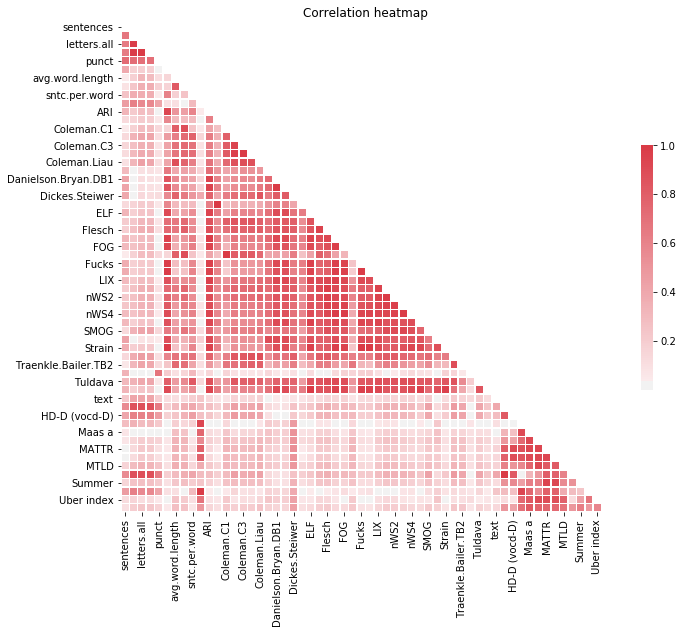

In [46]:
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set label
ax.set_title('Correlation heatmap')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns_fig = sns_plot.get_figure()
# sns_fig.savefig(...) 
sns_fig.savefig("./rapport/corr_heatmap.png")

In [37]:
np.set_printoptions(threshold='nan')

In [47]:
corr_list = corr.abs()
# top_corr = corr_list.sort_values(kind="quicksort", ascending=False)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    print(type(au_corr))
    au_corr.to_csv('./rapport./top_corr.csv')
    return au_corr[0:n]
_, ncol = df.shape
# print("Top Absolute Correlations")
print(get_top_abs_correlations(df.iloc[:,0:ncol-1], 20))

<class 'pandas.core.series.Series'>
Bormuth              DRP                    1.000000
ELF                  Wheeler.Smith          1.000000
Danielson.Bryan.DB1  Danielson.Bryan.DB2    0.999998
CTTR                 Root TTR               0.999992
Coleman.C1           FORCAST                0.999624
TTR                  TTR.1                  0.999601
nWS1                 nWS2                   0.997977
letters.all          syllables              0.995951
Linsear.Write        Strain                 0.995894
Fucks                Strain                 0.995046
Coleman.C3           Coleman.C4             0.992881
Fucks                Linsear.Write          0.989409
avg.sentc.length     Linsear.Write          0.989025
nWS3                 nWS4                   0.986849
avg.sentc.length     Strain                 0.985947
words                syllables              0.985389
                     letters.all            0.983413
avg.sentc.length     Fucks                  0.982508
FOG       

## Checking for NaN values

In [11]:
count_null_df = df.count(axis=0)/nrow
# count_null_df.sort_values(axis=0)
count_null_df = pd.DataFrame({'Column name':count_null_df.index, 'Ratio of non NaN values':count_null_df.values})
count_null_df = count_null_df.sort_values(by=['Ratio of non NaN values'])
count_null_df.head()

,Column name,Ratio of non NaN values
50,MATTR,0.199890
51,MSTTR,0.207763
0,sentences,1.000000
31,nWS1,1.000000
32,nWS2,1.000000


## Dropping MATTR & MSTTR columns

In [7]:
df = df.drop('MATTR', axis=1)
df = df.drop('MSTTR', axis=1)

In [8]:
# Get list of features w/o feature containing string values
(nrow, ncol) = df.shape
features = df.columns.values[0:ncol-1]


# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['level1']].values

In [22]:
df.describe()

,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,TTR,...,HD-D (vocd-D),Herdan's C,Maas a,Maas lgV0,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K
count,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,...,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000
mean,6.178103,69.591578,286.920871,94.919443,13.445405,13.808023,4.068831,1.342988,0.102530,0.723658,...,29.973272,0.919785,0.209477,4.362110,60.654317,5.621359,0.839242,0.723612,25.751004,175.234313
std,3.565665,41.665862,183.019658,60.276153,7.705855,11.104274,0.499349,0.145937,0.061869,0.101662,...,6.041291,0.029880,0.038736,0.985314,29.939369,1.308844,0.097361,0.101676,13.431118,96.680399
min,1.000000,5.000000,21.000000,6.000000,0.000000,1.437500,2.230769,1.000000,0.005435,0.294118,...,4.000000,0.720000,0.060000,1.100000,5.360000,1.770000,-2.510000,0.290000,4.000000,11.340000
25%,4.000000,38.000000,149.000000,49.000000,8.000000,8.000000,3.741098,1.243590,0.064516,0.652174,...,27.382500,0.900000,0.190000,3.730000,39.675000,4.620000,0.810000,0.650000,18.750000,110.190000
50%,6.000000,62.000000,250.000000,83.000000,12.000000,11.000000,4.028037,1.333333,0.090909,0.714286,...,32.000000,0.920000,0.210000,4.310000,55.070000,5.530000,0.860000,0.710000,23.020000,152.000000
75%,8.000000,92.000000,380.000000,125.000000,17.000000,15.500000,4.343750,1.427251,0.125000,0.791667,...,34.220000,0.940000,0.230000,4.840000,75.400000,6.560000,0.890000,0.790000,28.560000,214.500000
max,50.000000,464.000000,2050.000000,654.000000,122.000000,184.000000,9.913043,3.173913,0.695652,0.976190,...,41.000000,0.990000,0.500000,14.230000,493.920000,11.930000,3.510000,0.980000,251.780000,1564.100000


## Standardizing the features

In [9]:
x = StandardScaler().fit_transform(x)

In [10]:
df_x = df[df.columns[:ncol-1]]

In [11]:
df_x = StandardScaler().fit_transform(df_x)

In [12]:
df_x.shape

(27310, 56)

## Principal component analysis

In [27]:
# Get PCA on the 15th first components
pca = PCA(n_components=15)

In [28]:
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [29]:
pca_df = pd.concat([principalDf, df[['level1']]], axis = 1)

In [30]:
pca_df.iloc[:,-1].values

array(['C2', 'C2', 'C2', ..., 'A1', 'A1', 'A1'], dtype=object)

In [31]:
pca_df.shape

(27310, 16)

In [32]:
def get_pca_df(pca_df=pca_df):
    _,ncol = pca_df.shape
    x = pca_df.iloc[:,0:ncol-1]
    y = pca_df.iloc[:,-1].values
#     x_fs = df[chi2_feature_selection]
#     y_fs = df.loc[:,['level1']].values
    X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(x, y, random_state = 0)
    return [X_train_fs, X_test_fs, y_train_fs, y_test_fs]

In [33]:
pca_var_ratio = pca.explained_variance_ratio_
pca_var_ratio

array([0.49105074, 0.14071715, 0.12604162, 0.06971135, 0.03773674,
       0.02137207, 0.01918631, 0.01435404, 0.01298176, 0.01102198,
       0.01018059, 0.00870858, 0.00712489, 0.0059274 , 0.00532723])

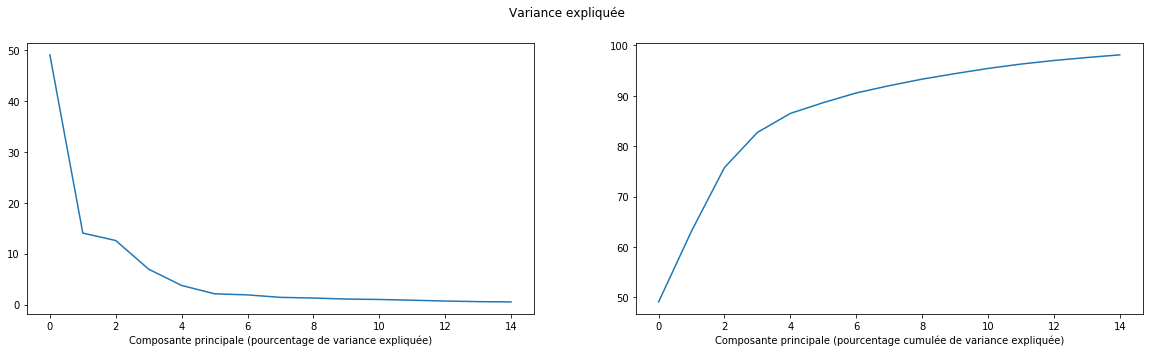

In [34]:
fig, (ax1, ax2) = plt.subplots(1,ncols=2,  sharex= True, figsize=(20,5))
fig.suptitle('Variance expliquée')

# Explained variance desc sort
ax1.plot(pca_var_ratio*100,)
ax1.set_xlabel('Composante principale (pourcentage de variance expliquée)')

# Explained variance cumulative sum
pca_var_ratio_cumsum=np.cumsum(np.round(pca_var_ratio, decimals=4)*100)
ax2.plot(pca_var_ratio_cumsum,)
ax2.set_xlabel('Composante principale (pourcentage cumulée de variance expliquée)')

# Bring subplots close to each other.
fig.subplots_adjust(hspace=0)
fig.savefig('./rapport/PCA_graph.png')
fig.savefig('./rapport/PCA_graph.svg')

- ** 4 components to reach >=80% **
- ** 7 components to reach >=90% **
- ** 11 components to reach >=95% **



In [35]:
pca_var_ratio_cumsum

array([49.11, 63.18, 75.78, 82.75, 86.52, 88.66, 90.58, 92.02, 93.32,
       94.42, 95.44, 96.31, 97.02, 97.61, 98.14])

In [36]:
# print(pca.components_.sort())
pca_components = pd.DataFrame(pca.components_,columns=features)
pca_components

,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,TTR,...,HD-D (vocd-D),Herdan's C,Maas a,Maas lgV0,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K
0,-0.041399,0.063143,0.079288,0.078378,0.022357,0.155404,0.119600,0.127588,-0.124616,-0.007459,...,0.075877,0.018712,-0.045200,0.061667,0.069472,0.083330,0.056810,-0.007593,0.032463,-0.051802
1,-0.291607,-0.285498,-0.283649,-0.284540,-0.253310,0.122727,-0.082166,-0.108185,0.040731,0.154328,...,-0.242013,0.063238,0.038727,-0.099191,-0.139610,-0.286619,-0.132456,0.154449,0.003887,0.107391
2,-0.053607,-0.123610,-0.099528,-0.104035,-0.058651,-0.098132,0.111911,0.087031,0.095356,0.329306,...,0.020503,0.347822,-0.338410,0.305268,0.249009,0.015522,0.185055,0.329043,0.317605,-0.260981
3,0.066076,0.142769,0.103198,0.104949,0.123136,0.172636,-0.246697,-0.247826,0.005268,0.029750,...,0.104461,0.095903,-0.151268,0.152596,0.148915,0.170513,0.128627,0.029825,0.096473,-0.165848
4,0.243082,-0.001663,0.027170,0.029145,0.350578,-0.048635,0.127331,0.137812,0.366247,0.003510,...,-0.146949,-0.022687,0.032070,-0.023392,-0.036559,-0.065603,-0.108553,0.003683,0.023069,0.065225
5,0.053013,0.040408,0.066906,0.044929,-0.230408,-0.060672,0.164669,-0.000134,0.132400,0.006496,...,-0.069038,0.010841,-0.002950,-0.007795,0.010947,0.011165,-0.063572,0.006791,-0.005302,-0.031898
6,-0.079432,-0.052735,-0.097681,-0.094547,0.112105,0.046418,-0.200834,-0.171578,-0.308309,-0.037599,...,0.192730,-0.031865,0.009824,0.018372,-0.003311,0.016258,0.188936,-0.038264,-0.004706,0.019930
7,-0.011029,0.137110,0.158359,0.101192,0.152237,0.054253,0.196512,-0.265326,-0.096997,-0.002640,...,-0.275621,-0.027736,0.006957,0.065190,0.097574,-0.003116,-0.319803,-0.001893,0.139220,0.045711
8,-0.069457,-0.053380,-0.077883,-0.057179,0.071693,0.030632,-0.165422,-0.024305,-0.079404,0.031273,...,-0.038741,0.017206,-0.005792,0.005613,0.000354,-0.034357,-0.052305,0.031662,0.023530,0.015416
9,0.083577,0.127883,0.106033,0.130297,-0.170461,0.034396,-0.126982,0.034894,0.123835,-0.070816,...,-0.136879,-0.093138,0.003918,0.178829,0.236907,0.016800,-0.220971,-0.070831,0.304257,0.166863


In [37]:
pca_components.describe()

,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,TTR,...,HD-D (vocd-D),Herdan's C,Maas a,Maas lgV0,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,-0.017541,-0.021595,-0.020148,-0.025750,0.015346,0.025469,0.026887,-0.024660,-0.013360,0.015903,...,0.000640,0.001014,-0.015598,0.066086,0.089889,-0.007149,-0.036428,0.015952,0.096691,0.035657
std,0.121979,0.123420,0.123650,0.123109,0.162282,0.082431,0.170021,0.129803,0.171316,0.113455,...,0.216869,0.128222,0.105995,0.109403,0.128725,0.114198,0.257083,0.113564,0.158249,0.149432
min,-0.291607,-0.285498,-0.283649,-0.284540,-0.253310,-0.098132,-0.246697,-0.265326,-0.308309,-0.171749,...,-0.317012,-0.239918,-0.338410,-0.099191,-0.139610,-0.286619,-0.491073,-0.171963,-0.165340,-0.260981
25%,-0.079769,-0.090807,-0.088303,-0.099291,-0.094149,-0.040150,-0.108351,-0.102549,-0.110807,-0.037403,...,-0.141914,-0.057485,-0.007879,-0.015594,-0.001478,-0.059667,-0.176714,-0.037851,-0.000409,-0.041850
50%,-0.041399,-0.033904,-0.037438,-0.012712,0.062326,0.030632,0.081679,-0.000134,-0.004483,-0.002640,...,-0.038741,-0.019343,0.003918,0.028327,0.095340,0.011165,-0.063572,-0.001893,0.032463,0.045711
75%,0.059544,0.069293,0.082603,0.077098,0.108920,0.064825,0.146000,0.062044,0.109596,0.030512,...,0.140738,0.040975,0.035399,0.159598,0.192911,0.049981,0.156841,0.030744,0.228299,0.137127
max,0.243082,0.142769,0.158359,0.130297,0.350578,0.172636,0.326927,0.137812,0.366247,0.329306,...,0.440976,0.347822,0.105164,0.305268,0.285316,0.170513,0.478998,0.329043,0.336693,0.251669


In [38]:
pca_components.head(1)

,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,TTR,...,HD-D (vocd-D),Herdan's C,Maas a,Maas lgV0,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K
0,-0.041399,0.063143,0.079288,0.078378,0.022357,0.155404,0.1196,0.127588,-0.124616,-0.007459,...,0.075877,0.018712,-0.0452,0.061667,0.069472,0.08333,0.05681,-0.007593,0.032463,-0.051802


## Features selection test w/ chi2 test

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
selectK = SelectKBest(score_func=chi2, k=10)
selectK_fit = selectK.fit(abs(df.loc[:, features].values), y)

In [15]:
df_x_dropped = df.iloc[:,0:ncol-1]

### Feature name : 10th

In [17]:
x_tmp = df_x_dropped
x_tmp.columns[selectK.get_support(indices=True)]
chi2_feature_selection = list(x_tmp.columns[selectK.get_support(indices=True)])

print(chi2_feature_selection)


Original number of features: 56
Reduced number of features: 56
['words', 'letters.all', 'syllables', 'punct', 'DRP', 'Fucks', 'Wheeler.Smith', 'text', 'MTLD', "Yule's K"]


In [ ]:
x_fs = df[chi2_feature_selection]
y_fs = df.loc[:,['level1']].values
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(x_fs, y_fs, random_state = 0)

In [43]:
def get_feature_selection_df(feature_list):
    x_fs = df[chi2_feature_selection]
    y_fs = df.loc[:,['level1']].values
    X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(x_fs, y_fs, random_state = 0)
    return [X_train_fs, X_test_fs, y_train_fs, y_test_fs]

### All features values

In [44]:
np.set_printoptions(precision=3)
print(selectK_fit.scores_)
bestK_features = selectK_fit.transform(abs(df.loc[:, features].values))
# summarize selected features
print(bestK_features[0:5,:])

[1.113e+04 4.159e+05 1.983e+06 6.512e+05 2.596e+04 8.937e+03 9.836e+01
 3.746e+01 1.448e+02 6.886e+01 8.019e+03 3.904e+03 2.063e+03 1.163e+04
 8.116e+03 8.605e+03 1.007e+04 1.259e+03 1.701e+02 1.173e+03 1.930e+03
 3.979e+05 4.201e+03 7.095e+03 1.025e+04 7.400e+03 7.785e+03 1.955e+02
 5.213e+04 8.943e+03 1.192e+04 4.347e+03 4.951e+03 5.094e+03 5.943e+03
 3.649e+03 4.597e+03 1.653e+02 5.274e+03 1.585e+04 9.821e+03 2.753e+03
 1.023e+03 4.201e+04 2.648e+07 3.412e+03 1.191e+04 9.480e-01 2.076e+00
 3.288e+02 5.047e+04 4.826e+03 2.320e+01 6.895e+01 7.672e+02 1.095e+05]
[[ 233.   1116.    363.     32.   3308.67   69.75   49.38   30.     70.74
   146.62]
 [ 180.    866.    268.     18.   2695.75  123.71   82.86    9.    107.12
   141.98]
 [ 180.    861.    269.     20.   2970.59   86.1    60.     23.    161.93
    62.96]
 [ 180.    872.    281.     20.   2819.43   87.2    63.     36.    141.1
    70.99]
 [ 187.    849.    283.     29.   3334.81   77.18   57.27   48.     70.69
   124.11]]


## Feature Importance test

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
model = ExtraTreesClassifier()
model.fit(x, np.ravel(y,order='C'))
print(model.feature_importances_)

[0.015 0.044 0.047 0.089 0.014 0.009 0.01  0.01  0.019 0.025 0.01  0.011
 0.012 0.01  0.016 0.012 0.01  0.01  0.01  0.009 0.011 0.01  0.009 0.01
 0.009 0.009 0.012 0.01  0.011 0.009 0.009 0.01  0.01  0.01  0.012 0.012
 0.017 0.01  0.011 0.015 0.012 0.015 0.012 0.009 0.086 0.048 0.047 0.011
 0.013 0.017 0.013 0.046 0.011 0.024 0.014 0.013]


In [47]:
# pd.DataFrame.from_records(model.feature_importances_,columns = features)
feature_importance = dict(zip(features, model.feature_importances_))
# feature_importance = pd.DataFrame([feature_importance.keys()], columns=feature_importance.values())
# feature_importance_sorted = sorted(feature_importance.items(),  reverse=True)
feature_importance_sorted = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

In [48]:
# sorted(feature_importance.items(), reverse=True)
# from collections import OrderedDict
# feature_importance_sorted = OrderedDict(sorted(feature_importance.items(), key=lambda x: x[1]))

### Plot 10th most important feature

Text(0.5,0,'Feature')

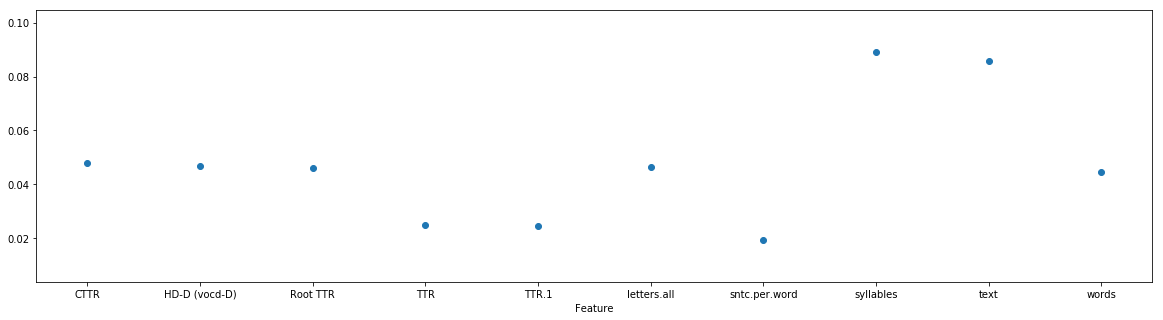

In [49]:
plt.figure(figsize=(20,5))
plt.scatter(*zip(*feature_importance_sorted[:10]))
plt.xlabel('Feature')

# Split x, y into train and test data

In [50]:
# from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [51]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [52]:
# X_train
# X_test
# y_train
# y_test

In [53]:
# Cost matrix is given by http://cap2018.litislab.fr/competition_en.pdf
# Lower is better.
def compute_performance_from_confusion_matrix(confusion_matrix):
    cost_matrix = np.array([[0,1,2,3,4,6], [1,0,1,4,5,8],[3,2,0,3,5,8], [10,7,5,0,2,7], [20,16,12,4,0,8], [44,38,32,19,13,0]])
    n = confusion_matrix.sum()
    # Performance E = Dot product of cost matrix and confusion matrix / nb_sample
    performance_E = np.vdot(cost_matrix, confusion_matrix)/n
    return performance_E
def compute_performance_from_predictions(ground_truth, predictions):
    cm = confusion_matrix(np.ravel(ground_truth, order='C'), predictions, binary=False)
    cost_matrix = np.array([[0,1,2,3,4,6], [1,0,1,4,5,8],[3,2,0,3,5,8], [10,7,5,0,2,7], [20,16,12,4,0,8], [44,38,32,19,13,0]])
    n = cm.sum()
    # Performance E = Dot product of cost matrix and confusion matrix / nb_sample
    performance_E = np.vdot(cost_matrix, cm)/n
    return performance_E

custom_loss = make_scorer(compute_performance_from_predictions, greater_is_better=False)

In [54]:
# Performance for feature selection
def get_performance_feature_selection_df(classifier, feature_list=chi2_feature_selection):
    datasets = get_feature_selection_df(feature_list)
    X_train = datasets[0]
    X_test = datasets[1]
    y_train = datasets[2]
    y_test = datasets[3]
    clf_trained = classifier.fit(X_train, np.ravel(y_train,order='C'))
    clf_predictions = clf_trained.predict(X_test)     
    accuracy = clf_trained.score(X_test, y_test)
    print("Accuracy = ", accuracy, "Error = ", 1-accuracy)    
    #

    cm = confusion_matrix(np.ravel(y_test,order='C'), clf_predictions, binary=False)
    error_perf = compute_performance_from_confusion_matrix(cm)
    print("Error w/ cost matrix = ", error_perf)
    return [accuracy, error_perf]

# Performance for PCA
def get_performance_pca_df(classifier, pca_df=pca_df):
    datasets = get_pca_df(pca_df)
    X_train = datasets[0]
    X_test = datasets[1]
    y_train = datasets[2]
    y_test = datasets[3]
    clf_trained = classifier.fit(X_train, np.ravel(y_train,order='C'))
    accuracy = clf_trained.score(X_test, y_test)
    print("Accuracy = ", accuracy, "Error = ", 1-accuracy)    
    #
    clf_predictions = clf_trained.predict(X_test) 
    cm = confusion_matrix(np.ravel(y_test,order='C'), clf_predictions, binary=False)
    error_perf = compute_performance_from_confusion_matrix(cm)
    print("Error w/ cost matrix = ", error_perf)
    return [accuracy, error_perf]
    

In [55]:
def save_output_to_file(str_filename):
    with open('./rapport./' + str_filename, 'w') as f:
        f.write(cap.stdout)

In [56]:
pca_df.shape

(27310, 16)

In [57]:
custom_loss

make_scorer(compute_performance_from_predictions, greater_is_better=False)

In [58]:
from bayes_opt import BayesianOptimization

## KNN multiclass

In [59]:
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
y_train.shape

(20482, 1)

In [55]:
# training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, np.ravel(y_train,order='C'))

In [56]:
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.762888107791447


** Result = 0.762888107791447 **

In [72]:
y_test.shape

(6828, 1)

In [73]:
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(np.ravel(y_test,order='C'), knn_predictions, binary=False)

In [74]:
compute_performance_from_confusion_matrix(cm)

0.5642940831868776

** Result = 0.5642940831868776 **

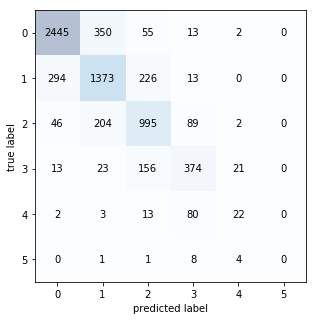

In [75]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
fig.set_size_inches(5,5)
plt.show()

## Test performance for feature selection

In [80]:
perf_fs_knn = get_performance_feature_selection_df(KNeighborsClassifier(n_neighbors = 7))

Accuracy =  0.7366725248974809 Error =  0.2633274751025191
Error w/ cost matrix =  0.5303163444639719


In [59]:
# Test to iterate over K neighbors
def iter_k_neighbors(k):
    accuracy_result = pd.Series(index=[list(range(1,k))])
#     predict_result = pd.Series(index=[list(range(1,k))])
#     predict_result = [list(range(1,k))]
#     cm_result = pd.Series(index=[list(range(1,k))])
    cm_result = [list(range(1,k))]
    for i in range(1,k):
        k_nn = KNeighborsClassifier(n_neighbors = k).fit(X_train, np.ravel(y_train,order='C'))
        accuracy_result[i] = k_nn.score(X_test, y_test)
        print("k=",i, "Accuracy=", accuracy_result[i])
        predict_result = knn.predict(X_test) 
        cm = confusion_matrix(y_test, predict_result)
        print(cm)
    return [accuracy_result, predict_result, cm_result]

## Test performance for PCA

In [100]:
perf_pca_knn = get_performance_pca_df(KNeighborsClassifier(n_neighbors = 7))

Accuracy =  0.7577621558289397 Error =  0.2422378441710603
Error w/ cost matrix =  0.5746924428822495


## Hyperparameter optimization

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
def knncv(k):
    val = cross_val_score(
        KNeighborsClassifier(n_neighbors = k),
        X_train, y_train.ravel(), cv=2
    ).mean()

    return val

In [67]:
gp_params = {"alpha": 1e-5}

knnBO = BayesianOptimization(knncv,
    {'k': (1, 25)})
knnBO.explore({'k': list(range(1,25))})


knnBO.maximize(n_iter=25, **gp_params)
print('-' * 53)
# with open('output.txt', 'w') as f:
#     f.write(cap.stdout)
save_output_to_file("svm_optimized_steps.txt")

Initialization
-----------------------------------------
 Step |   Time |      Value |         k | 


KeyboardInterrupt: 

** Optimal k = 14**

In [117]:
print('KNN: %f' % knnBO.res['max']['max_val'])

TypeError: must be real number, not NoneType

In [118]:
knn = KNeighborsClassifier(n_neighbors = 14).fit(X_train, np.ravel(y_train,order='C'))
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.7769478617457528


** Result = 0.7769 **

In [119]:
knn_predictions = knn.predict(X_test) 
compute_performance_from_predictions(y_test, knn_predictions)

0.536174575278266

** Performance error = 0.53617 **

In [120]:
perf_fs_knn_optim = get_performance_feature_selection_df(KNeighborsClassifier(n_neighbors = 14))

Accuracy =  0.7365260691271236 Error =  0.2634739308728764
Error w/ cost matrix =  0.5322202694786174


In [121]:
perf_pca_knn_optim = get_performance_pca_df(KNeighborsClassifier(n_neighbors = 14))

Accuracy =  0.7697715289982425 Error =  0.23022847100175747
Error w/ cost matrix =  0.5471587580550674


## SVM multiclass

In [60]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [61]:
from sklearn.svm import SVC

In [56]:
# training a linear SVM classifier
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train,np.ravel(y_train,order='C'))
svm_predictions = svm_model_linear.predict(X_test)

In [57]:
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.7753368482718219


** Result = 0.775 **

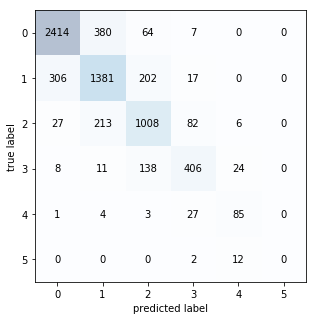

In [59]:
# creating a confusion matrix
cm = confusion_matrix(np.ravel(y_test,order='C'), svm_predictions)
fig, ax = plot_confusion_matrix(conf_mat=cm)
fig.set_size_inches(5,5)
plt.show()

In [ ]:
compute_performance_from_confusion_matrix(cm)

## Test performance for feature selection

In [59]:
datasets = get_feature_selection_df(feature_list=chi2_feature_selection)
X_train = datasets[0]
X_test = datasets[1]
y_train = datasets[2]
y_test = datasets[3]
classifier = SVC(kernel = 'linear', C = 1)

In [63]:
X_train.head()

,words,letters.all,syllables,punct,DRP,Fucks,Wheeler.Smith,text,MTLD,Yule's K
2784,111,440,141,24,-4846.87,36.67,17.50,2078,61.27,141.22
21571,49,184,66,18,-4929.32,23.00,12.50,15082,30.26,349.85
6940,109,389,139,14,-4730.74,55.57,27.14,6874,50.41,164.97
22193,13,50,16,4,-4009.48,50.00,20.00,4638,47.32,118.34
8359,56,240,70,17,-4566.99,26.67,12.22,3644,56.00,146.68


In [ ]:
clf_trained = classifier.fit(X_train, np.ravel(y_train,order='C'))

In [ ]:
clf_predictions = clf_trained.predict(X_test)     
accuracy = clf_trained.score(X_test, y_test)
print("Accuracy = ", accuracy, "Error = ", 1-accuracy)    
#

cm = confusion_matrix(np.ravel(y_test,order='C'), clf_predictions, binary=False)
error_perf = compute_performance_from_confusion_matrix(cm)
print("Error w/ cost matrix = ", error_perf)
# return [accuracy, error_perf]

## Test performance for Feature Selection

In [ ]:
perf_fs_svm = get_performance_feature_selection_df(SVC(kernel = 'linear', C = 1))

## Test performance for PCA

In [63]:
perf_pca_svm = get_performance_pca_df(SVC(kernel = 'linear', C = 1))

Accuracy =  0.7574692442882249 Error =  0.24253075571177507
Error w/ cost matrix =  0.5039543057996485


In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [111]:
def svccv(C, gamma):
    val = cross_val_score(
        SVC(C=C, gamma=gamma, random_state=0),
        X_train, np.ravel(y_train, order='C'), cv=2
    ).mean()
    return val

In [79]:
gp_params = {"alpha": 1e-5}

In [112]:
svcBO = BayesianOptimization(svccv, {'C': (0.001, 100), 'gamma': (0.0001, 0.1)})
svcBO.explore({'C': [70.3639, 31.5522, 78.0449], 'gamma': [0.0097, 0.0158 , 0.0054]})

In [113]:
svcBO.maximize(n_iter=30, **gp_params)
print('-' * 53)

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    1 | 00m23s |    0.79748 |   70.3639 |    0.0097 | 
    2 | 00m21s |    0.79631 |   31.5522 |    0.0158 | 
    3 | 00m21s |    0.79704 |   78.0449 |    0.0054 | 
    4 | 00m24s |    0.79421 |   83.2951 |    0.0167 | 
    5 | 00m22s |    0.79289 |   37.0916 |    0.0275 | 
    6 | 00m25s |    0.77990 |   10.9617 |    0.0701 | 
    7 | 00m27s |    0.77155 |   59.3832 |    0.0478 | 
    8 | 00m29s |    0.75930 |   74.4372 |    0.0585 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    9 | 00m39s |    0.41480 |    0.0010 |    0.0001 | 
   10 | 00m26s |    0.74836 |  100.0000 |    0.0001 | 
   11 | 00m28s |    0.74041 |   20.1963 |    0.0001 | 
   12 | 00m28s |    0.74485 |   47.9541 |    0.0001 | 
   13 | 00m27s |    0.74768 |   93.1523 |    0.0001 | 


C:\Users\Minh Tri\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.909e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


   14 | 00m27s |    0.74617 |   65.0595 |    0.0001 | 
   15 | 00m27s |    0.74490 |   53.9115 |    0.0001 | 
   16 | 00m36s |    0.76350 |   14.8623 |    0.1000 | 
   17 | 00m35s |    0.75525 |   26.8104 |    0.1000 | 
   18 | 00m29s |    0.74446 |   42.0150 |    0.0001 | 
   19 | 00m39s |    0.74129 |   80.6300 |    0.0994 | 
   20 | 00m30s |    0.74734 |   88.0555 |    0.0001 | 
   21 | 00m35s |    0.77688 |    6.3296 |    0.1000 | 
   22 | 00m30s |    0.74778 |   96.9414 |    0.0001 | 
   23 | 00m36s |    0.75149 |   34.2915 |    0.1000 | 
   24 | 00m35s |    0.73264 |    8.4295 |    0.0001 | 
   25 | 00m42s |    0.74182 |   68.1290 |    0.1000 | 
   26 | 00m38s |    0.75300 |   29.4710 |    0.1000 | 
   27 | 00m31s |    0.74080 |   23.4826 |    0.0001 | 
   28 | 00m33s |    0.74602 |   61.9163 |    0.0001 | 
   29 | 00m38s |    0.74387 |   39.2664 |    0.0001 | 
   30 | 00m34s |    0.74446 |   45.1344 |    0.0001 | 
   31 | 00m40s |    0.72293 |    4.0831 |    0.0001 | 
   32 | 00

C:\Users\Minh Tri\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.162e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 46, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   38 | 00m31s |    0.74675 |   76.4827 |    0.0001 | 


C:\Users\Minh Tri\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.853e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


-----------------------------------------------------


In [114]:
max_param = svcBO.res['max']['max_params']
max_param
print('SVC: {} for C={} and gamma={} '.format(svcBO.res['max']['max_val'], max_param['C'], max_param['gamma']))
# 8 | 00m20s | score   0.79631 | C = 70.3639 | Gamma    0.0097  | 

SVC: 0.7974802360989064 for C=70.3639 and gamma=0.0097 


In [115]:
svm_model = SVC(C = max_param['C'], gamma=max_param['gamma']).fit(X_train,np.ravel(y_train,order='C'))

In [116]:
svm_predictions = svm_model.predict(X_test)
accuracy = svm_model.score(X_test, y_test)
print(accuracy)
# Result = 0.822788517867604
compute_performance_from_predictions(y_test, svm_predictions)

0.8255711775043937


0.4094903339191564

** Accuracy = 0.8255711775043937 **

** Performance error = 0.4094903339191564 **

## Test Feature selection performance

In [70]:
perf_fs_svm_opt = get_performance_feature_selection_df(SVC(C = 70.3639, gamma=0.0097))

Accuracy =  0.4197422378441711 Error =  0.5802577621558289
Error w/ cost matrix =  2.1673989455184532


In [71]:
perf_fs_svm_opt = get_performance_feature_selection_df(SVC(C = 70.3639, gamma=0.0097))

Accuracy =  0.4197422378441711 Error =  0.5802577621558289
Error w/ cost matrix =  2.1673989455184532


In [73]:
%save playground_23-06-18 72

The following commands were written to file `playground_23-06-18.py`:
get_ipython().run_line_magic('save', 'playground_23-06-18')


In [2]:
# %load playground_23-06-18
get_ipython().run_line_magic('save', 'playground_23-06-18')


## Test PCA performance

In [64]:
perf_pca_svm_opt = get_performance_pca_df(SVC(C = 70.3639, gamma=0.0097))

Accuracy =  0.8082893966022261 Error =  0.1917106033977739
Error w/ cost matrix =  0.42984768599882833


In [66]:
# creating a confusion matrix
cm = confusion_matrix(np.ravel(y_test,order='C'), svm_predictions)
fig, ax = plot_confusion_matrix(conf_mat=cm)
fig.set_size_inches(5,5)
plt.show()
# Model tend to underestimate because more there are more wrong prediction on the lower triangle

NameError: name 'svm_predictions' is not defined

In [103]:
print(cm)
cost_matrix = [[0,1,2,3,4,6], [1,0,1,4,5,8],[3,2,0,3,5,8], [10,7,5,0,2,7], [20,16,12,4,0,8], [44,38,32,19,13,0]]
cost_matrix

[[2551  258   47    9    0    0]
 [ 246 1494  147   18    1    0]
 [  39  151 1078   64    4    0]
 [  15   12  123  413   23    1]
 [   1    5    5   28   79    2]
 [   0    0    0    1   10    3]]


[[0, 1, 2, 3, 4, 6],
 [1, 0, 1, 4, 5, 8],
 [3, 2, 0, 3, 5, 8],
 [10, 7, 5, 0, 2, 7],
 [20, 16, 12, 4, 0, 8],
 [44, 38, 32, 19, 13, 0]]

In [65]:
cm.sum()

NameError: name 'cm' is not defined

In [121]:
np.trace(cm)/6828

0.822788517867604

In [117]:
np.vdot(cost_matrix,cm)/6828

0.4128588166373755

In [148]:
svm_model = SVC(C = 31.5522, gamma=0.0158, class_weight=cost_matrix).fit(X_train,np.ravel(y_train,order='C'))

C:\Users\Minh Tri\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == 'balanced':


ValueError: class_weight must be dict, 'balanced', or None, got: array([[ 0,  1,  2,  3,  4,  6],
       [ 1,  0,  1,  4,  5,  8],
       [ 3,  2,  0,  3,  5,  8],
       [10,  7,  5,  0,  2,  7],
       [20, 16, 12,  4,  0,  8],
       [44, 38, 32, 19, 13,  0]])

In [147]:
svm_predictions = svm_model.predict(X_test)
accuracy = svm_model.score(X_test, y_test)
print(accuracy)
# Result = 0.822788517867604
compute_performance_from_predictions(y_test, svm_predictions)

0.822788517867604


0.4128588166373755

In [138]:
test_set = pd.read_csv('../test_cap2018.csv')

In [158]:
test_set.shape

(13656, 59)

In [139]:
df_test = prepare_data(test_set)
x_test = standard_scale_x_data(df_test)

In [149]:
nrow, ncol = df_test.shape
df_x = standard_scale_x_data(df_test)

In [150]:
df_x.shape

(13656, 56)

In [152]:
svm_predictions = svm_model.predict(x_test)

In [121]:
import datetime
today = datetime.datetime.today().strftime('%Y-%m-%d')

In [157]:
svm_predictions
# pd.to_csv(svm_predictions)
# filename = './submissions/submit-' + today + '.csv'
filename = './submissions/submit_Team-UTC_' + today + '.csv'
# np.savetxt(filename, svm_predictions, delimiter=",", fmt='%1.4e')
df_res = pd.DataFrame(svm_predictions)
df_res.to_csv(filename, index=False, header=False)

In [156]:
df_res.shape

(13656, 1)

In [154]:
svm_predictions

array(['A1', 'A1', 'A2', ..., 'B1', 'A1', 'A2'], dtype=object)

In [151]:
x_test.shape

(13656, 56)

In [5]:
import tensorflow as tf

x = tf.constant(35, name='x')
y = tf.Variable(x + 5, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

ImportError: Could not find 'cudart64_90.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Download and install CUDA 9.0 from this URL: https://developer.nvidia.com/cuda-toolkit